<div class="alert block alert-info alert">

# <center> Scientific Programming in Python

## <center>Karl N. Kirschner<br>Bonn-Rhein-Sieg University of Applied Sciences<br>Sankt Augustin, Germany

# <center> Data Visualization using Seaborn

**Source**: https://seaborn.pydata.org/tutorial.html
<br><br>

- Enables more complex and alternate plots


- Uses matplotlib as a base
    - however, some syntax is different, while others are the same
    - functions that control some Seaborn things, for example:
        - markers=["D", "o"]
        - sizes=(10, 125)
        - edgecolor=".2"
        - linewidth=.5,
        - alpha=.75
    
**Bibtex file**:
@article{Waskom2021,<br>
    doi = {10.21105/joss.03021},<br>
    url = {https://doi.org/10.21105/joss.03021},<br>
    year = {2021},<br>
    publisher = {The Open Journal},<br>
    volume = {6},<br>
    number = {60},<br>
    pages = {3021},<br>
    author = {Michael L. Waskom},<br>
    title = {seaborn: statistical data visualization},<br>
    journal = {Journal of Open Source Software}<br>
 }

<hr style="border:2px solid gray"></hr>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Seaborn built-in datasets
Seaborn comes with several dataset

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
tips = sns.load_dataset("tips")

print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<hr style="border:2px solid gray"></hr>

# Relationship Ploting

- dependent and independent variables

##  `scatterplot` for Scatter Plotting

`seaborn.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)`

- https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

- Example: Plotting x, y data (i.e., 2D plots)
    - scatterplot
    - relplot with kind=scatter
    - replot with kind=line


- Notice: how we now define the data source using `data=df`.

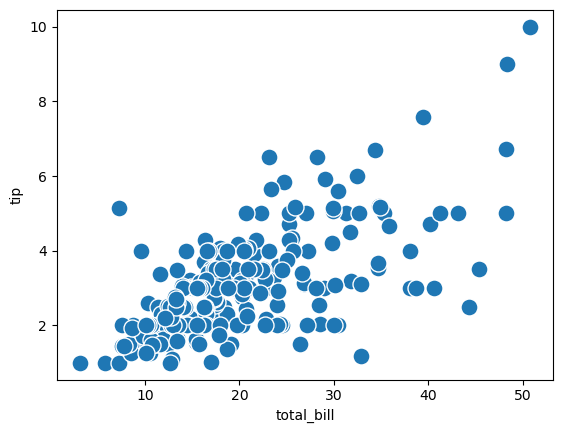

In [6]:
sns.scatterplot(data=tips, x="total_bill", y="tip", s=150)
plt.show()

#### matplotlib functions
- Seaborn is built on top of matplotlib.

- Thus, one still has access to matplotlib's function - due to `import matplotlib.pyplot as plt` above.

- Example functions:
    - `plt.xlabel`
    - `plt.minorticks_on()`
    - `plt.show`

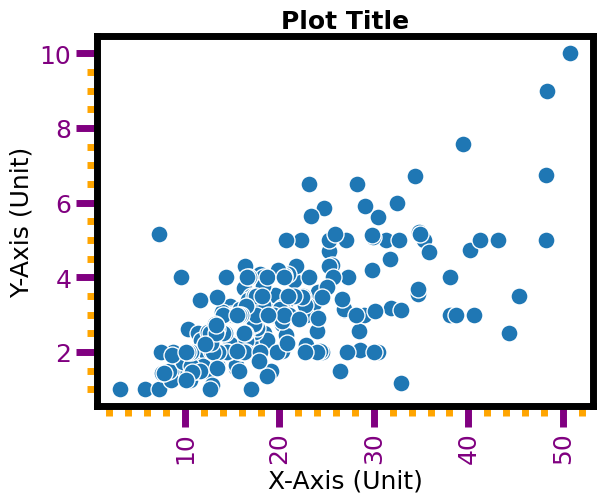

In [7]:
plot_fontsize = 18

plt.rc('axes', linewidth=5)

sns.scatterplot(data=tips, x="total_bill", y="tip", s=150)

plt.xlabel(xlabel='X-Axis (Unit)', fontsize=plot_fontsize)
plt.ylabel(ylabel='Y-Axis (Unit)', fontsize=plot_fontsize)
plt.title(label='Plot Title', fontsize=plot_fontsize, fontweight='bold')

plt.xticks(rotation='vertical', fontsize=plot_fontsize)
plt.yticks(rotation='horizontal', fontsize=plot_fontsize)

plt.minorticks_on()
plt.tick_params(axis='x', which='minor', direction='out')

plt.tick_params(which='both', width=5)

plt.tick_params(which='major', length=15, colors='purple')
plt.tick_params(which='minor', length=7.5, color='orange')

plt.show()

## Seaborn built-in styles

https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles

- sns.set(style="ticks")
    - `darkgrid` (default)
    - `whitegrid`
    - `dark`
    - `white`
    - `ticks`

Demonstration of the the five styles:

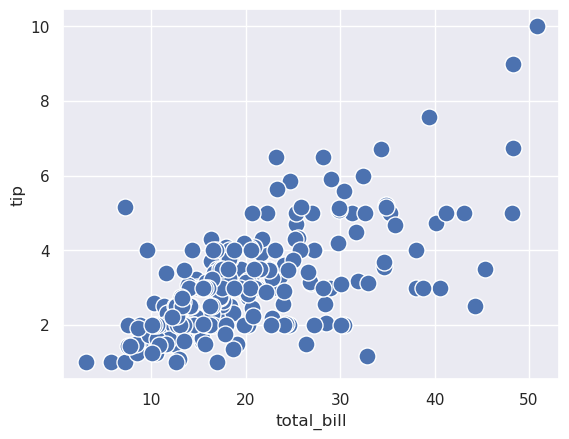

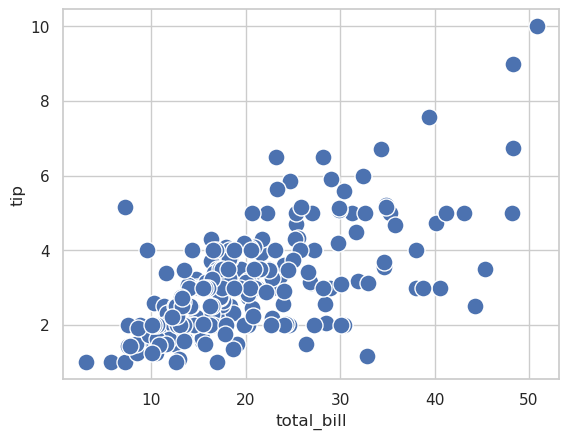

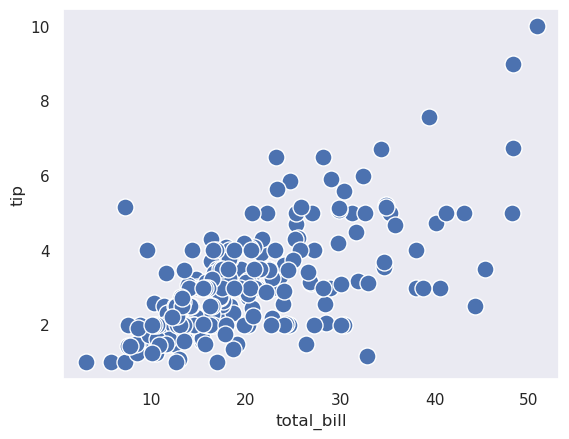

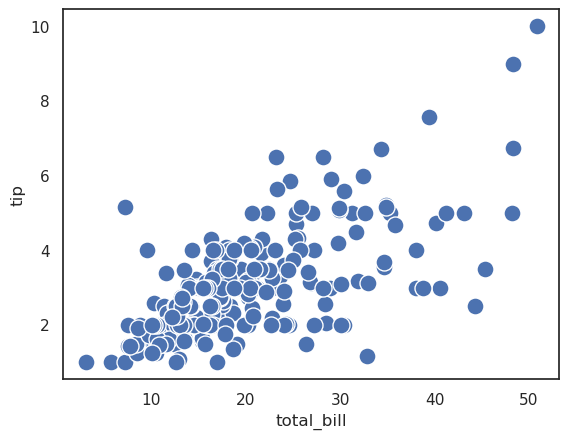

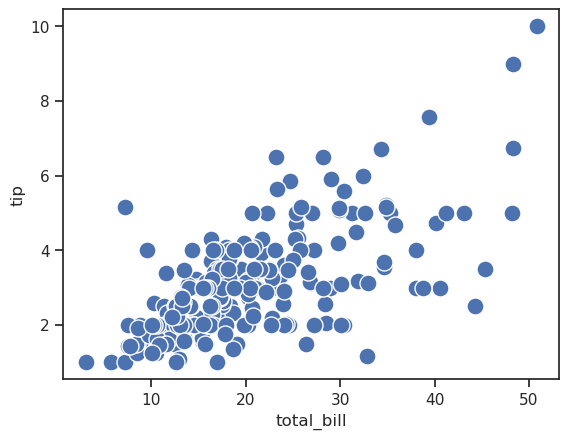

In [8]:
sns_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for style in sns_styles:
    sns.set(style=style)

    sns.scatterplot(data=tips, x='total_bill', y='tip', s=150)
    plt.show()

## `relplot` for Relational Plot

This is  bit more powerful than `scatterplot` since we can **segregate and organize** data into **rows and columns of subplots**.

https://seaborn.pydata.org/generated/seaborn.relplot.html

`seaborn.relplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, units=None, **kwargs)`

- relationship between two variables


- `kind`: `scatter` or `line`
- `height` (in inches

### Scatter Plot

- `kind='scatter'`

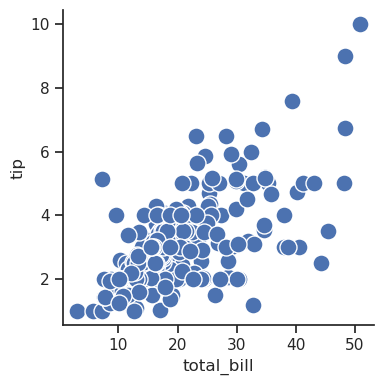

In [10]:
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', s=150, height=4)
plt.show()

Now **segregate** using different **subplots** the data based on 'smoker' attribute:
- `col`

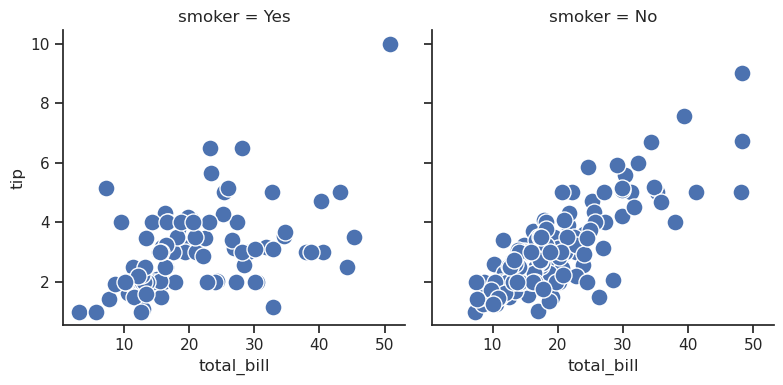

In [11]:
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', s=150, height=4,
            col='smoker')
plt.show()

Now **segregate** using **colors** the data based on the 'sex' attribute:
- `hue`

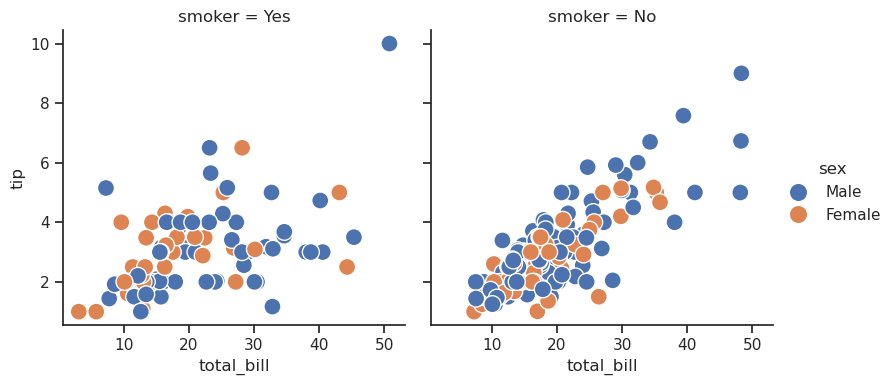

In [13]:
sns.relplot(data=tips, x="total_bill", y="tip", kind='scatter', s=150, height=4,
            col='smoker', hue="sex")
plt.show()

Now further **segregate** using different **marker shapes** according to the'party size':

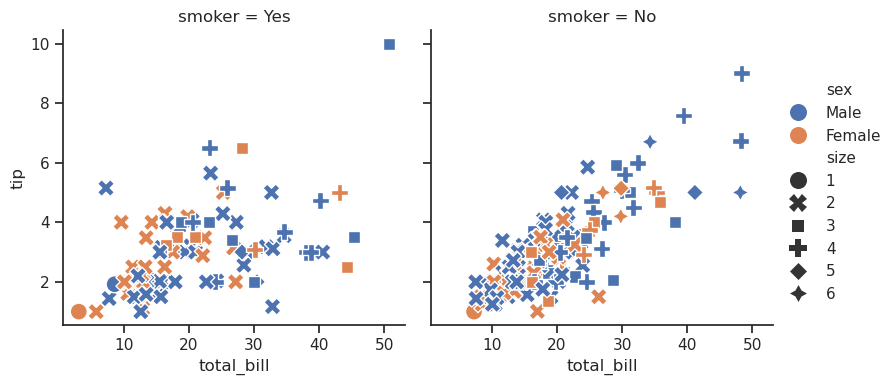

In [15]:
sns.relplot(data=tips, x="total_bill", y="tip", kind='scatter', s=150, height=4,
            col='smoker', hue="sex", style="size")
plt.show()

Control the subplot layout
- `col_wrap`

Without `col_wrap`

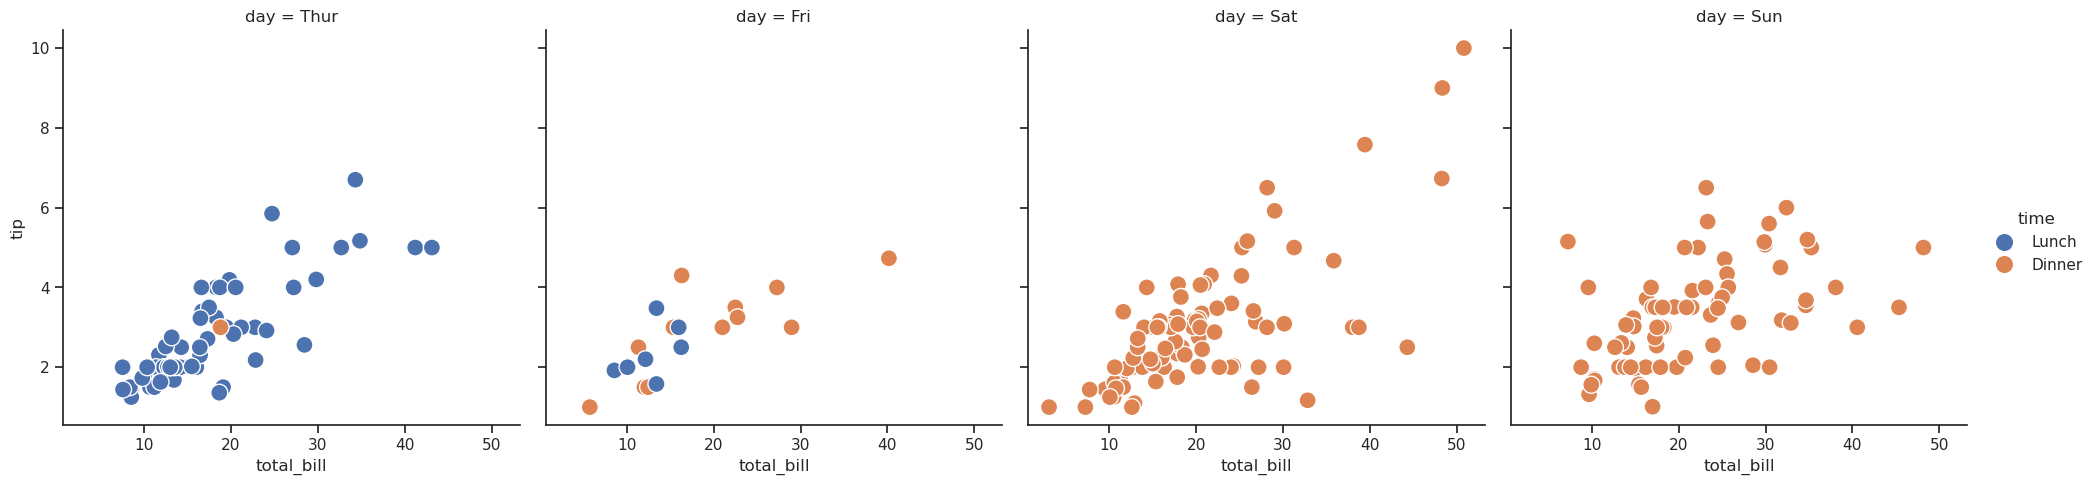

In [16]:
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', s=150,
            col='day', hue='time')
plt.show()

With `col_wrap`:

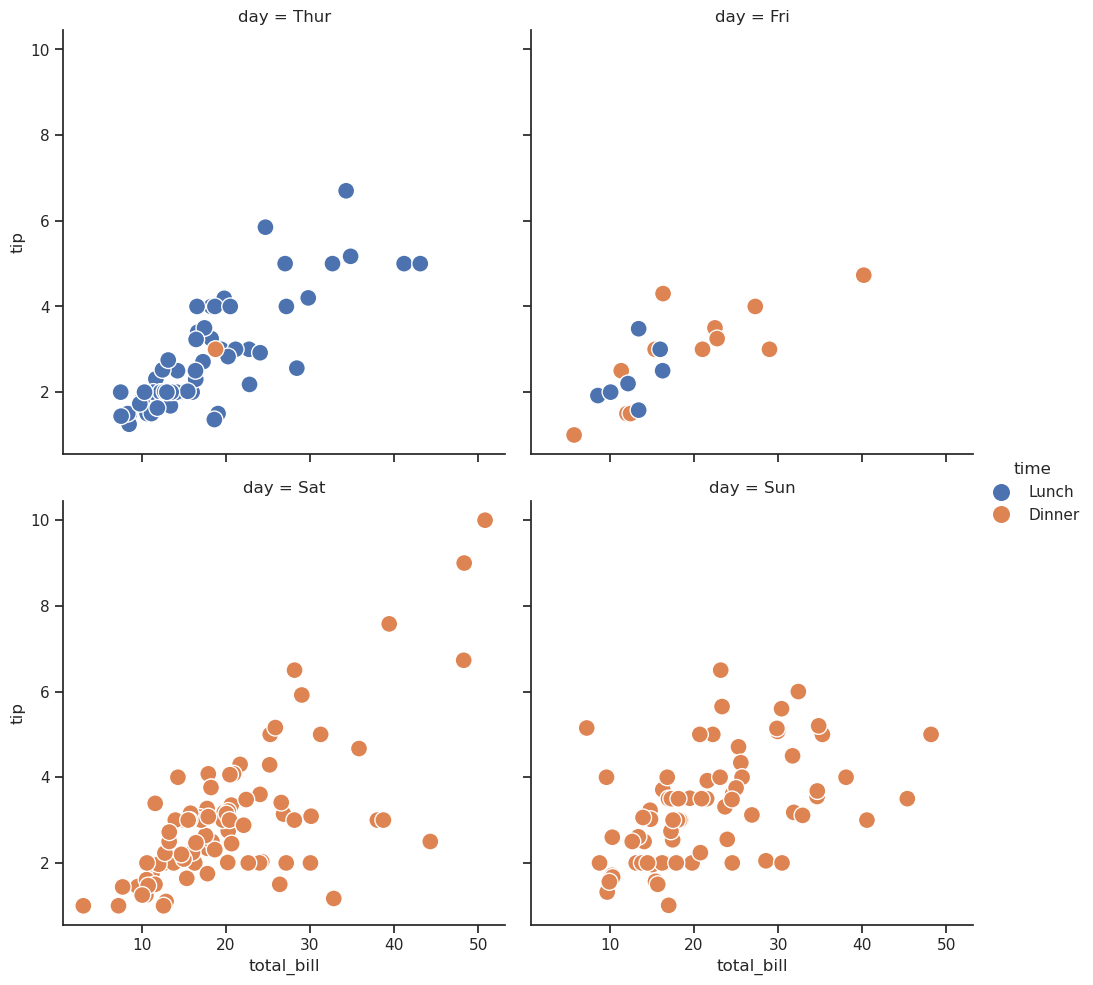

In [17]:
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', s=150,
            col='day', hue='time', col_wrap=2)
plt.show()

## Jointplots

- scatter plots with histograms

`seaborn.jointplot(data=None, *, x=None, y=None, hue=None, kind='scatter', height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, color=None, palette=None, hue_order=None, hue_norm=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, **kwargs)`

- https://seaborn.pydata.org/generated/seaborn.jointplot.html


- `kind`
    - scatter
    - reg (linear regression with 95% confidence interval)
    - resid (residuals)
    - kde (plots using kernel density estimates)
    - hex (histogram with hexagonal bins)

#### Scatter + Histogram
- `kind=scatter`

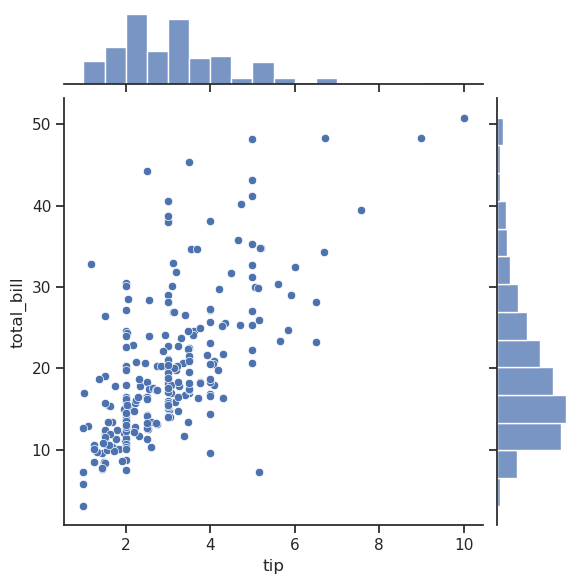

In [18]:
sns.jointplot(data=tips, x='tip', y='total_bill',
              kind='scatter')
plt.show()

#### Scatter + Histogram + Regression

Add a regression line and kernel density fits

- `kind=reg`
- linear regression with 95% confidence interval

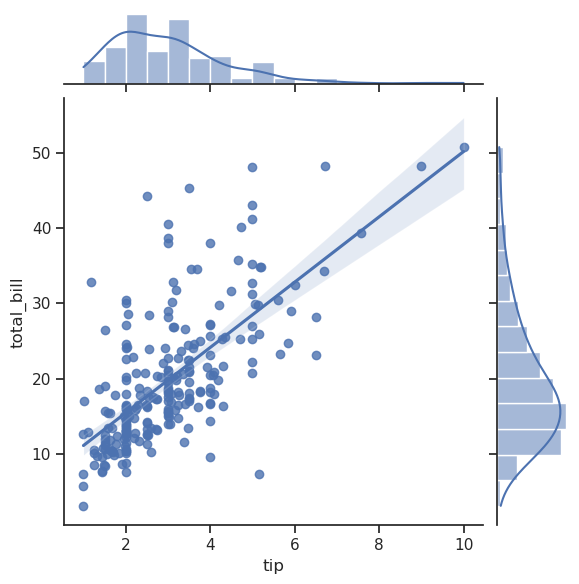

In [19]:
sns.jointplot(data=tips, x='tip', y='total_bill',
              kind='reg')
plt.show()

#### Scatter + Histogram with Kernel Density Estimation for Smoothing Data

https://en.wikipedia.org/wiki/Kernel_density_estimation
 
- `kind="kde"`
- estimate population based on finite sampling

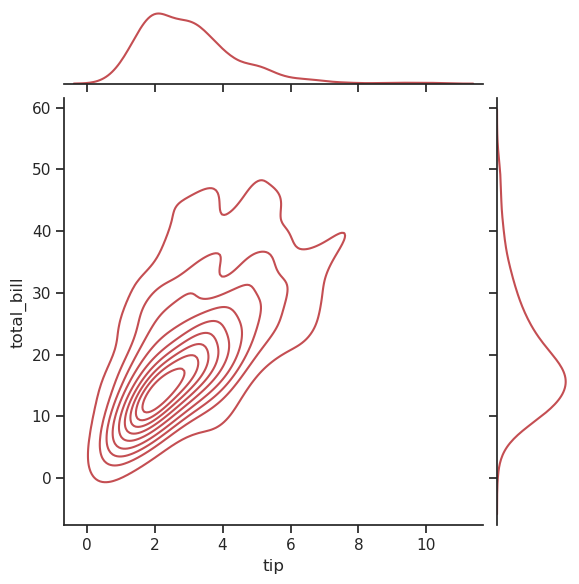

In [20]:
sns.jointplot(data=tips, x='tip', y='total_bill',
              kind='kde', color='r')
plt.show()

## KDE plot

Plot the distribution of observations in a dataset.

- KDE plots with a little more control

`seaborn.kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)`

- https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot

Plot the distribution of **a variable** (e.g., 'total_bill) as a function of **another variable** (e.g. 'size').
- Notice: no `y-data` is specified - this is comving from `hue`

- `common_norm`
    - `True`, scale the densities by the number of observations (i.e., the total area under all densities is equal to 1).
    - `False` (default): unscaled, independent densities

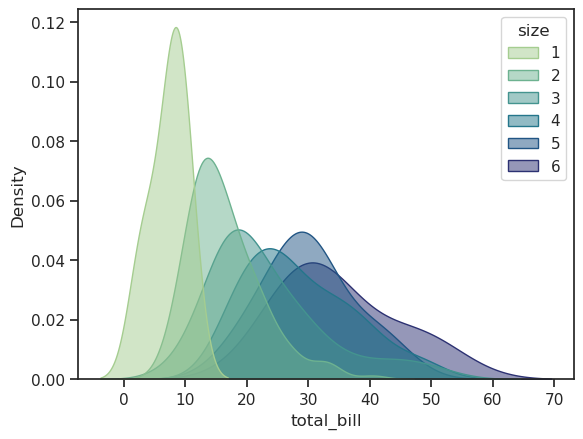

In [24]:
sns.kdeplot(data=tips, x='total_bill', hue='size',            
            fill=True, alpha=0.5, 
            common_norm=False, palette="crest")
plt.show()

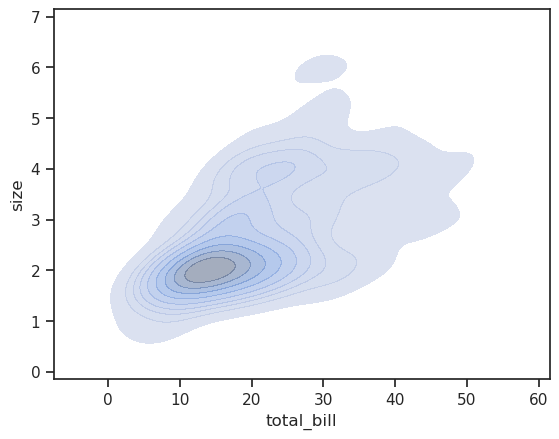

In [25]:
sns.kdeplot(data=tips, x='total_bill', y='size',
            fill=True, alpha=0.5)
plt.show()

Increasing the 
- `levels`
    - `int`: Number of contour levels
    - `list` (i.e. vector): values to draw contours at

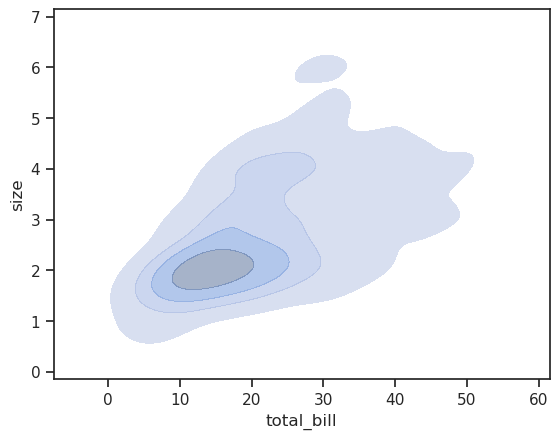

In [28]:
sns.kdeplot(data=tips, x='total_bill', y='size',
            levels=5,
            fill=True, alpha=0.5)
plt.show()

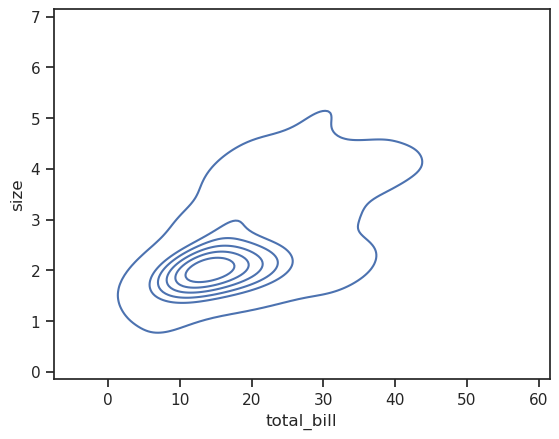

In [31]:
sns.kdeplot(data=tips, x='total_bill', y='size',
            levels=[0.0, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            fill=False)
plt.show()

<hr style="border:2px solid gray"></hr>

## Categorical plots

- plots whose data **includes categories** (non-numerical data; discrete data)

- different than looking for relationships between numerical-based data using scatter plots

### `catplot`

- plot the relationship between **a numerical** and **one or more categorical** variables

`seaborn.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, kind='strip', estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, order=None, hue_order=None, row_order=None, col_order=None, col_wrap=None, height=5, aspect=1, log_scale=None, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci=<deprecated>, **kwargs)`

- https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

- `kind`
    - Categorical **estimate** plots:
        - pointplot (kind="point")
        - **barplot** (kind="bar")
        - countplot (kind="count")
    - Categorical **distribution** plots:
        - boxplot (kind="box")
        - **violinplot** (kind="violin")
        - boxenplot (kind="boxen")
    - Categorical **scatter** plots
        - **stripplot** (kind="strip"; default)
        - swarmplot (kind="swarm")

#### Bar plots

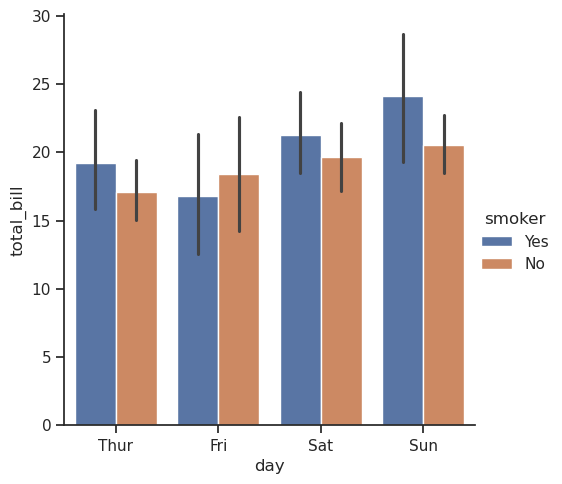

In [32]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker',
            kind='bar')
plt.show()

#### Violin Plots

- Show the **distribution of data** after variables are grouped (one or more).
- Each "violin" is drawn using a **KDE** of the underlying distribution.

<br>

- Data distribution

    - dot or line: **mean**
    - thick gray line: the **interquartile range** (a.k.a. **middle 50%**)
        - https://en.wikipedia.org/wiki/Interquartile_range
    - thin gray line: the **rest** of the data **minus "outliers"**

- KDE
    - A kistogram like representation of the data

<br>

- https://en.wikipedia.org/wiki/Violin_plot
- https://seaborn.pydata.org/generated/seaborn.violinplot.html

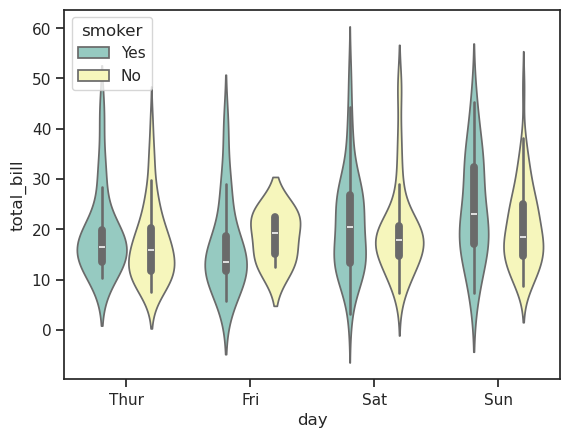

In [33]:
sns.violinplot(data=tips, x='day', y='total_bill', hue='smoker',
               palette='Set3')
plt.show()

Consolidate plots by **combining** their **distribution** via **splitting the violin**:

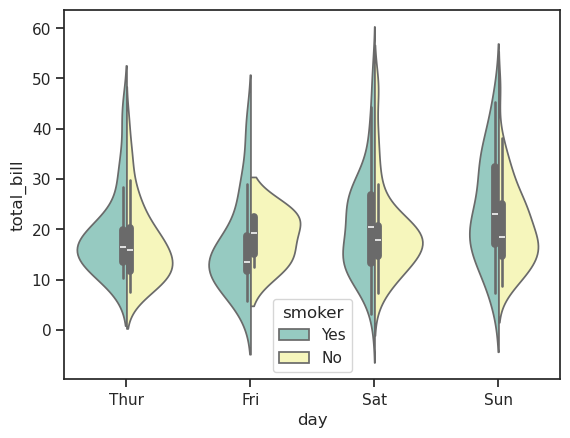

In [34]:
sns.violinplot(data=tips, x='day', y='total_bill', hue='smoker',
               palette='Set3', split=True)
plt.show()

Display the underlying data with some sense of their distribution
- "beeswarm" plot

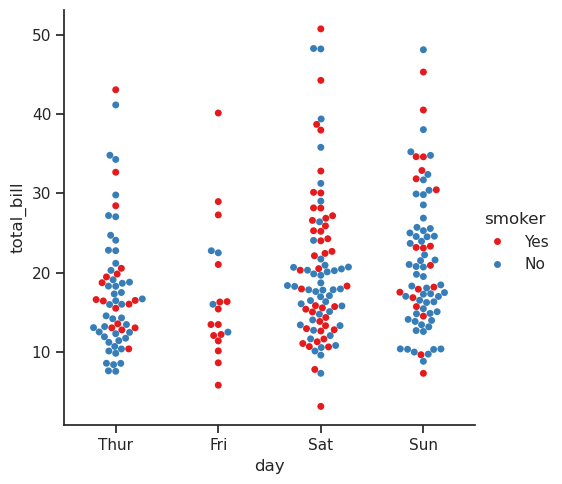

In [35]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker',
               palette='Set1', kind="swarm")
plt.show()

#### `stripplot`

- An alternative to the above

- Use in combo with violin or box plots

`seaborn.stripplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor=<default>, linewidth=0, hue_norm=None, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)`

- `jitter`: spread the data out some (like in a beeswarm plot)
- 
- https://seaborn.pydata.org/generated/seaborn.stripplot.html

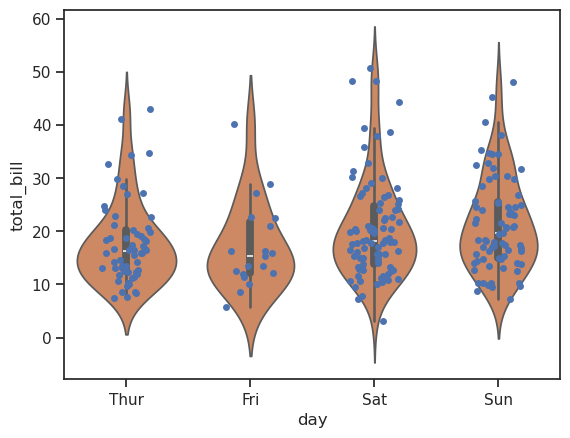

In [38]:
sns.stripplot(data=tips, x='day', y='total_bill', jitter=0.2)

sns.violinplot(data=tips, x='day', y='total_bill')

plt.show()

<hr style="border:2px solid gray"></hr>

# Subplots
- use matplotlib
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

    - share axes: `sharey` and `sharex`
 
    - plot locations: `ax`

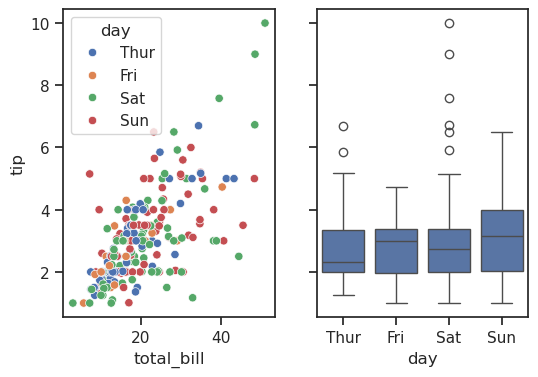

In [39]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))

sns.boxplot(x='day', y='tip', data=tips,
            ax=axes[1])

sns.scatterplot(data=tips, x='total_bill', y='tip',
                hue='day',
                ax=axes[0])

plt.show()

## Pairwise associations of the data, with distributions

- Univariate distribution of the column data along the diagonal axes


- A good way to get an over of possible relationships within the data

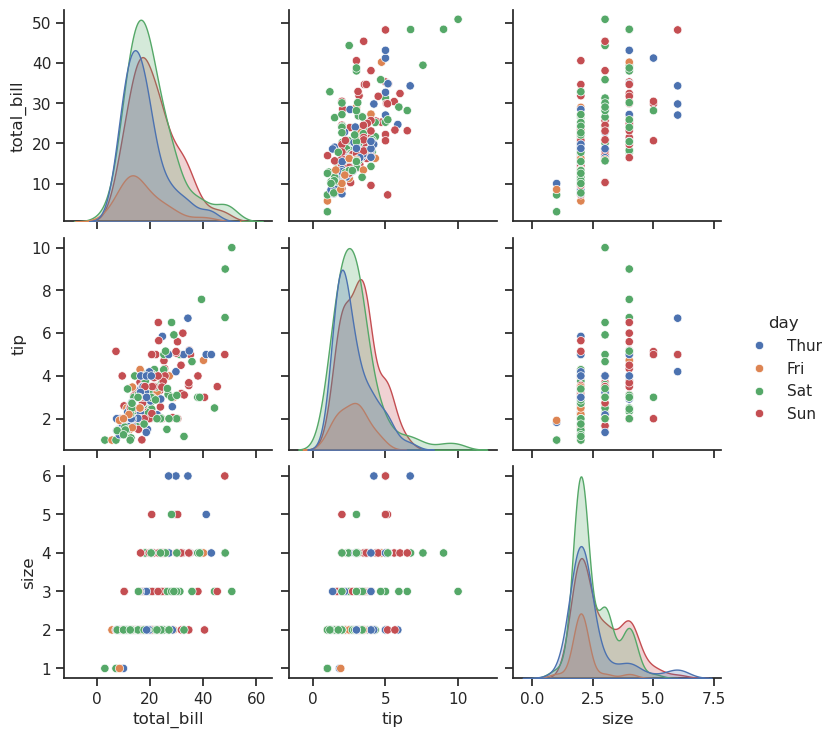

In [40]:
sns.pairplot(data=tips, hue='day',
             kind='scatter')
plt.show()

Simplify the visualization
- `corner=True`

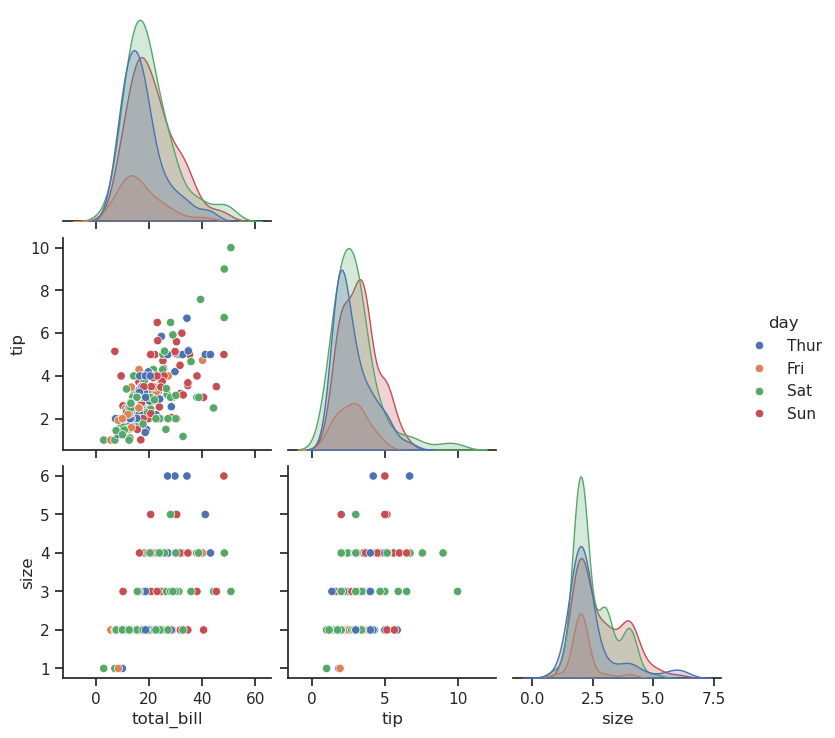

In [41]:
sns.pairplot(data=tips, hue='day',
             kind='scatter', corner=True)
plt.show()

Introduce regression lines into the scatter plots
- `kind="reg"`

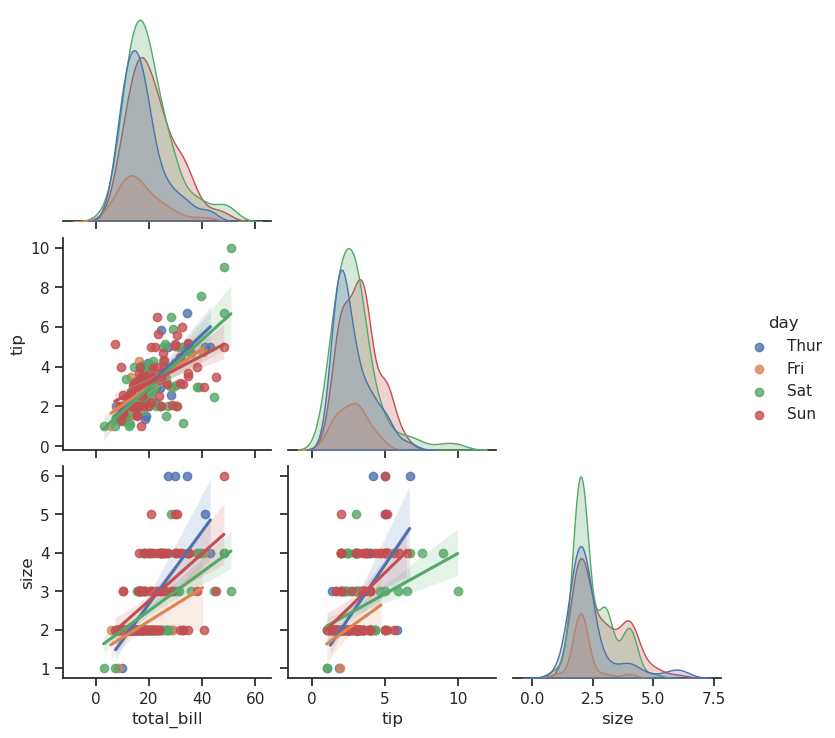

In [42]:
sns.pairplot(data=tips, hue='day',
             kind='reg', corner=True)
plt.show()

<hr style="border:2px solid gray"></hr>

## Color Paletts in Seaborn
https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

- Every continuous colormap can be reversed version: <b>name_r</b>

**Possible values**:

- Accent, Accent_r
- Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r
- CMRmap, CMRmap_r
- Dark2, Dark2_r
- GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r
- OrRd, OrRd_r, Oranges, Oranges_r
- PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r
- RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r
- Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r
- Wistia, Wistia_r
- YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r
- afmhot, afmhot_r, autumn, autumn_r
- binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r
- cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r
- gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r
- hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r
- magma, magma_r, mako, mako_r
- nipy_spectral, nipy_spectral_r
- ocean, ocean_r
- pink, pink_r, plasma, plasma_r, prism, prism_r
- rainbow, rainbow_r, rocket, rocket_r
- seismic, seismic_r, spring, spring_r, summer, summer_r
- tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r
- viridis, viridis_r, vlag, vlag_r
- winter, winter_r

### Qualitative

- Used with categorical data (e.g., days of the week, smoker/non-smoker)


- For example:
    - pastel, deep, dark, colorblind
    - Paired, Set2

In [43]:
len(sns.color_palette('pastel'))

10

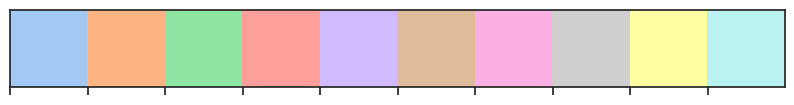

In [44]:
sns.palplot(sns.color_palette('pastel', 10))

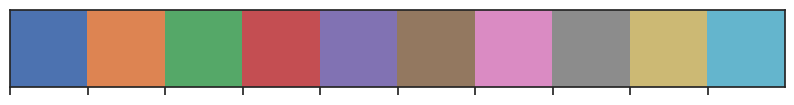

In [45]:
palette = 'deep'
sns.palplot(sns.color_palette(palette, len(sns.color_palette(palette))))

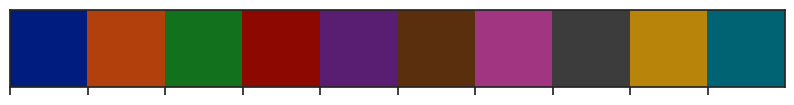

In [46]:
palette = 'dark'
sns.palplot(sns.color_palette(palette, len(sns.color_palette(palette))))

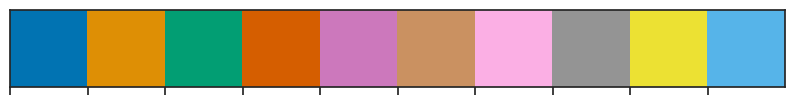

In [47]:
palette = 'colorblind'
sns.palplot(sns.color_palette(palette, len(sns.color_palette(palette))))

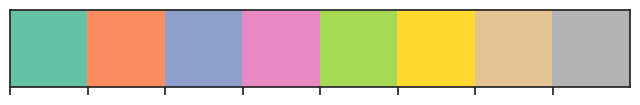

In [48]:
palette = 'Set2'
sns.palplot(sns.color_palette(palette, len(sns.color_palette(palette))))

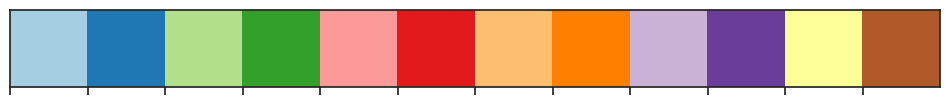

In [49]:
palette = 'Paired'
sns.palplot(sns.color_palette(palette, len(sns.color_palette(palette))))

### Sequential

- Sequential data where you need to highlight the one end and the middle part of the data (e.g. elevation)


- Examples
    - Blues
    - cubehelix
    - GnBu_d

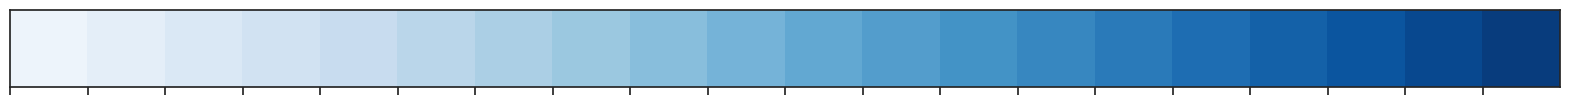

In [54]:
sns.palplot(sns.color_palette('Blues', 20))

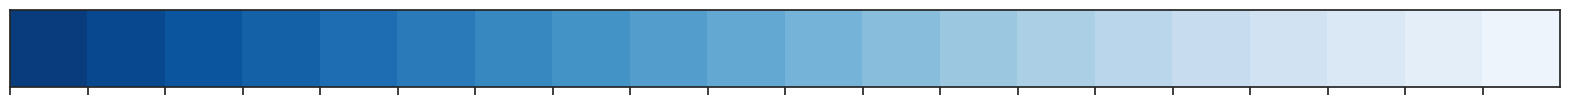

In [53]:
sns.palplot(sns.color_palette('Blues_r', 20))

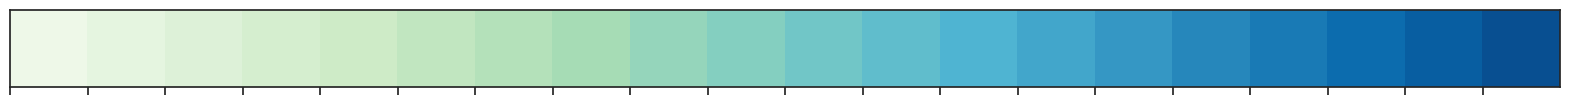

In [55]:
sns.palplot(sns.color_palette('GnBu', 20))

Darker version: **_d**

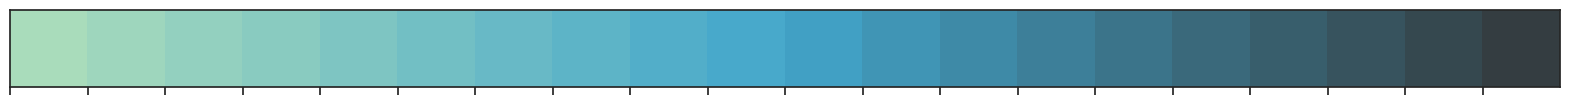

In [56]:
sns.palplot(sns.color_palette('GnBu_d', 20))

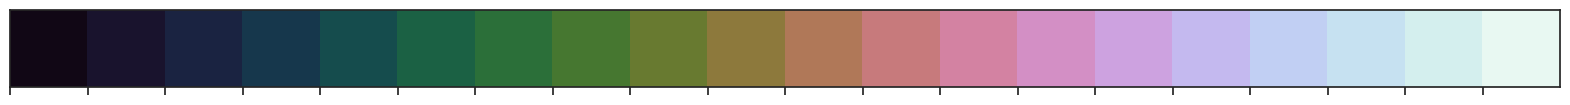

In [57]:
sns.palplot(sns.color_palette('cubehelix', 20))

### Divergent

- Use when the high and low values are more interesting (and the middle is not) - e.g. data normalized from -1 to +1

- Example
    - Spectral
    - BrBG
    - RdBu

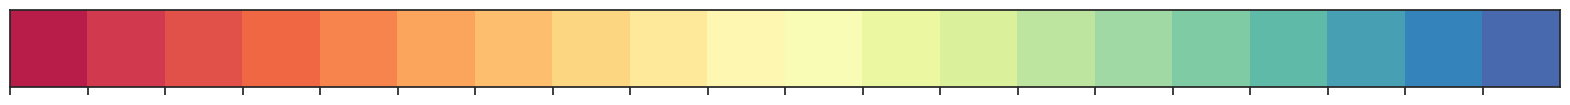

In [58]:
sns.palplot(sns.color_palette('Spectral', 20))

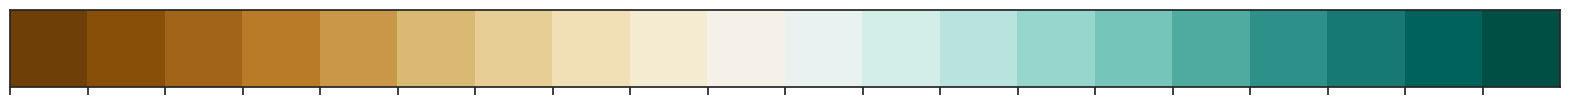

In [59]:
sns.palplot(sns.color_palette('BrBG', 20))

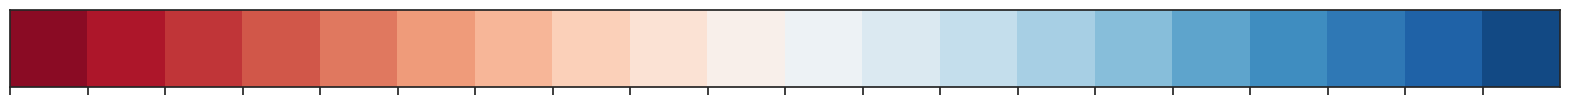

In [60]:
sns.palplot(sns.color_palette('RdBu', 20))

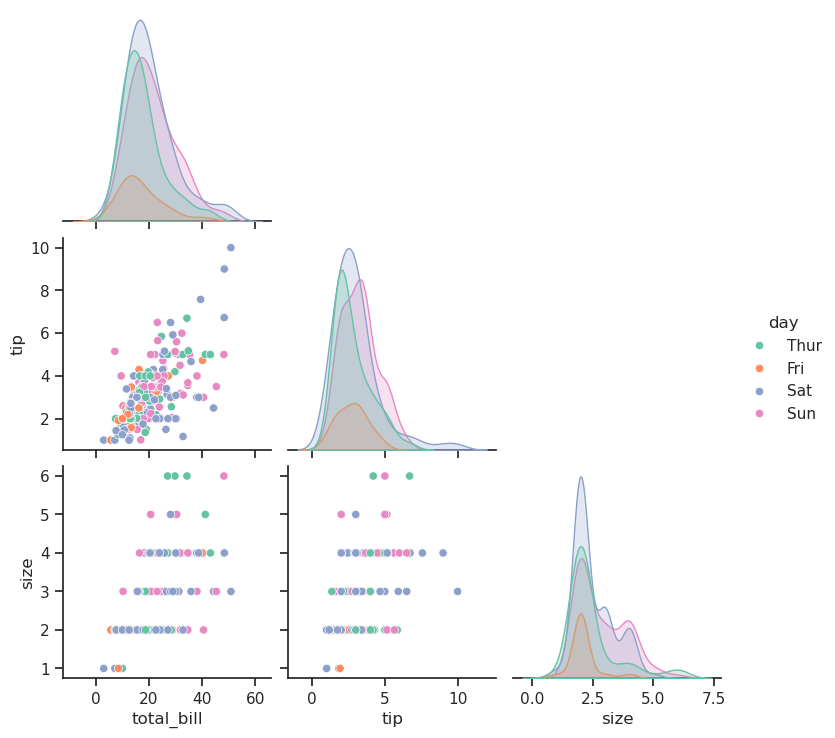

In [62]:
## qualitative: dark vs Set2
sns.pairplot(data=tips, hue='day', kind='scatter', palette='Set2', corner=True)

plt.show()

<hr style="border:2px solid gray"></hr>

# Additional examples for other packages:

https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=Xn0jLwr8evoR